In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlp import *
import itertools
from sklearn.metrics import f1_score

In [28]:
def learn_with_val_vis(data, network, MSE_target, metric, lr, info_interval = 100, momentum_coef = 0.0, batch_size = None, max_epochs=10**10):
    X_train, Y_train, X_test, Y_test = data
    k = 1/1000
    ef_lr = lr
    max_x = max(X_train)
    min_x = min(X_train)
    max_y = max(Y_train)
    min_y = min(Y_train)

    avgx = (max_x + min_x) / 2
    avgy = (max_y + min_y) / 2

    x_scl = (max_x - min_x) / 2
    y_scl = (max_y - min_y) / 2
    X_tr_scl = (X_train - avgx) / x_scl
    Y_tr_scl = (Y_train - avgy) / y_scl
    X_ts_scl = (X_test - avgx) / x_scl
    Y_ts_scl = (Y_test - avgy) / y_scl

    epoch = 0
    pred = network.predict_multiple(X_ts_scl.reshape(-1,1)).reshape(-1) * y_scl + avgy
    LOSS = np.mean((Y_test-pred)**2)
    while(True):
        if epoch % info_interval == 0:
            print(f"Weights, epoch: {epoch}, LOSS: {LOSS}")
        pred = network.predict_multiple(X_ts_scl.reshape(-1,1)).reshape(-1) * y_scl + avgy
        LOSS = np.mean((Y_test - pred)**2)
        if np.isnan(LOSS):
            return
        if LOSS< MSE_target or epoch > max_epochs:
            if epoch % info_interval != 0:
                print(f"Weights, epoch: {epoch}, LOSS: {LOSS}")
            break
        network.epoch(X_tr_scl.reshape(-1,1), Y_tr_scl.reshape(-1,1), metric, ef_lr, momentum_coef, batch_size)
        epoch +=1
        ef_lr = lr / (1 + epoch *k)
    plt.plot(X_test, Y_test, 'o', label='Original Data')
    plt.plot(X_test, pred.reshape(-1), 'o', color='red', label='Predicted Data')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"MSE: {LOSS}")
    plt.legend()

# Tests on multimodal

In [3]:
train = pd.read_csv("data/regression/multimodal-large-training.csv")
test = pd.read_csv("data/regression/multimodal-large-test.csv")

X_train = train['x'].values
Y_train = train['y'].values
X_test = test['x'].values
Y_test = test['y'].values

data = (X_train, Y_train, X_test, Y_test)

max_x = max(X_train)
min_x = min(X_train)
max_y = max(Y_train)
min_y = min(Y_train)

avgx = (max_x + min_x) / 2
avgy = (max_y + min_y) / 2

x_scl = (max_x - min_x) / 2
y_scl = (max_y - min_y) / 2
X_tr_scl = (X_train - avgx) / x_scl
Y_tr_scl = (Y_train - avgy) / y_scl
X_ts_scl = (X_test - avgx) / x_scl
Y_ts_scl = (Y_test - avgy) / y_scl

[1, 10, 1]
identity
Weights, epoch: 0, MSE: 223615.60586636965
Weights, epoch: 25, MSE: 4500.553043677499
Weights, epoch: 50, MSE: 4709.975113372732
Weights, epoch: 75, MSE: 4575.660222717833
Weights, epoch: 100, MSE: 4881.323552553846
Weights, epoch: 125, MSE: 4488.634771473458
Weights, epoch: 150, MSE: 4468.135319855843
Weights, epoch: 175, MSE: 4782.489332561575
Weights, epoch: 200, MSE: 4535.53779241735
Weights, epoch: 225, MSE: 4443.717048527436
Weights, epoch: 250, MSE: 4498.452889561532
Weights, epoch: 275, MSE: 4491.450877531169
Weights, epoch: 300, MSE: 4528.7482262829335
Weights, epoch: 325, MSE: 4451.281511508202
Weights, epoch: 350, MSE: 4437.183622007148
Weights, epoch: 375, MSE: 5043.629014533142
Weights, epoch: 400, MSE: 4498.064899952353
Weights, epoch: 425, MSE: 4569.99429276547
Weights, epoch: 450, MSE: 4445.9949311457785
Weights, epoch: 475, MSE: 4479.805999616524
Weights, epoch: 500, MSE: 4436.864173866078
Weights, epoch: 501, MSE: 4445.297609489206
[1, 10, 1]
sigmo

/home/hussein/pytoniec/lib/python3.13/site-packages/numpy/_core/numeric.py:983: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/home/hussein/pytoniec/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in relu_derivative (vectorized)
  outputs = ufunc(*inputs)


[1, 10, 10, 10, 1]
identity
Weights, epoch: 0, MSE: 867202.0752238752


/home/hussein/pytoniec/lib/python3.13/site-packages/numpy/_core/numeric.py:983: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


[1, 10, 10, 10, 1]
sigmoid
Weights, epoch: 0, MSE: 35235.93758815494
Weights, epoch: 25, MSE: 371.2457851255578
Weights, epoch: 50, MSE: 328.2774642800968
Weights, epoch: 75, MSE: 116.57179919688927
Weights, epoch: 100, MSE: 37.957516126121256
Weights, epoch: 125, MSE: 9.830725536097892
Weights, epoch: 150, MSE: 5.693698889948975
Weights, epoch: 175, MSE: 5.761214225349709
Weights, epoch: 200, MSE: 5.612929260183291
Weights, epoch: 225, MSE: 3.2990994558739315
Weights, epoch: 250, MSE: 3.006749931528225
Weights, epoch: 275, MSE: 6.233376810141908
Weights, epoch: 300, MSE: 3.340061155009409
Weights, epoch: 325, MSE: 4.978000533361592
Weights, epoch: 350, MSE: 5.698544311695168
Weights, epoch: 375, MSE: 2.500770847629839
Weights, epoch: 400, MSE: 3.4951570998534423
Weights, epoch: 425, MSE: 2.4526982211016075
Weights, epoch: 450, MSE: 2.398116500923967
Weights, epoch: 475, MSE: 2.4085211102655286
Weights, epoch: 500, MSE: 2.382088990943165
Weights, epoch: 501, MSE: 2.238835675834057
[1, 

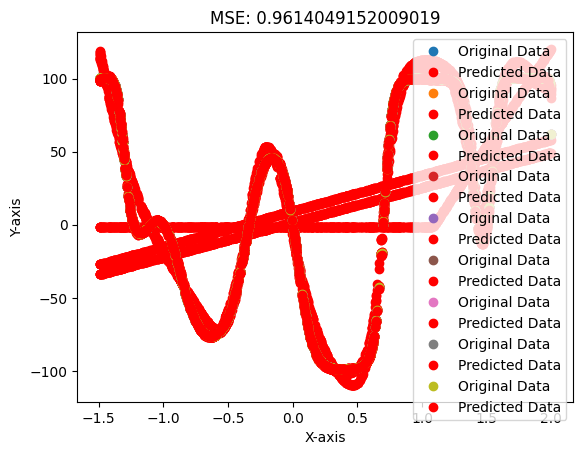

In [4]:
architectures = [[1,10,1], [1,10,10,1], [1,10,10,10,1]]
activations = ['identity','sigmoid','arctan','relu']
for arch, acts in itertools.product(architectures, activations):
    print(arch)
    print(acts)
    activ = [acts] * (len(arch)-2) + ['identity']
    network = MLP(arch, activ)
    learn_with_val_vis(data, network, 1,"MSE", 0.1, 25, 0.9, 5, 500)




In [18]:
#najlepszy arctan i sigmoida na 3 warstwach

In [6]:
def cross_entropy_loss(y_true, y_pred, epsilon=1e-12):
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)  # Avoid log(0)
    return -np.sum(y_true * np.log(y_pred))

def one_hot_encode_last_column(df):
    column = df.columns[-1]  # Get the last column name
    one_hot = pd.get_dummies(df[column], prefix=column, dtype=int)  # One-hot encode
    df = df.drop(columns=[column])  # Drop original column
    return pd.concat([df, one_hot], axis=1)

In [5]:
def visualise_real_vs_predict(X_test, original_cat_test, pred):
    plt.figure()
    scatter_or = plt.scatter(X_test[:,0], X_test[:,1], c=pd.Categorical(original_cat_test).codes, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Categories')
    categories = pd.Categorical(original_cat_test).categories
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter_or.cmap(scatter_or.norm(i)), markersize=10) for i in range(len(categories))]
    plt.legend(handles, categories, title='Categories')

    plt.figure()
    scatter_pr = plt.scatter(X_test[:,0], X_test[:,1], c=pd.Categorical(pred).codes, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Predicted Categories')
    categories = pd.Categorical(pred).categories
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter_pr.cmap(scatter_pr.norm(i)), markersize=10) for i in range(len(categories))]
    plt.legend(handles, categories, title='Predicted Categories')
    plt.show()

In [31]:
def learn_with_val_vis(data, network, f_measure_target, metric, lr, info_interval = 100, momentum_coef = 0.0, batch_size = None, max_epochs=10**10):
    X_train, Y_train, X_test, Y_test = data
    k = 1/1000
    ef_lr = lr
    max_x = np.max(X_train, axis=0)
    min_x = np.min(X_train, axis=0)
    original_cat_test = np.argmax(Y_test, axis=1)

    avgx = (max_x + min_x) / 2


    x_scl = (max_x - min_x) / 2
    X_tr_scl = (X_train - avgx) / x_scl
    X_ts_scl = (X_test - avgx) / x_scl

    epoch = 0
    pred = network.predict_multiple(X_ts_scl)
    LOSS = cross_entropy_loss(Y_test, pred) if metric == "CE" else np.mean((Y_test-pred)**2)
    pred = np.argmax(pred, axis=1)
    f_measure = f1_score(original_cat_test, pred, average = 'macro')
    while(True):
        if epoch % info_interval == 0:
            print(f"Weights, epoch: {epoch}, LOSS: {LOSS}, f-measure: {f_measure}")
        pred = network.predict_multiple(X_ts_scl)
        LOSS = cross_entropy_loss(Y_test, pred) if metric == "CE" else np.mean((Y_test-pred)**2)
        pred = np.argmax(pred, axis=1)
        f_measure = f1_score(original_cat_test, pred, average='macro')
        if f_measure >= f_measure_target or epoch > max_epochs:
            if epoch % info_interval != 0:
                print(f"Weights, epoch: {epoch}, LOSS: {LOSS}, f-measure: {f_measure}")
            break
        network.epoch(X_tr_scl, Y_train, metric, ef_lr, momentum_coef, batch_size)
        epoch +=1
        ef_lr = lr / (1 + epoch *k)
    visualise_real_vs_predict(X_test, original_cat_test, pred)

# 1.1 Steps Large sigmoid

In [26]:
train = pd.read_csv("data/regression/steps-large-training.csv")
test = pd.read_csv("data/regression/steps-large-test.csv")

X_train = train['x'].values
Y_train = train['y'].values
X_test = test['x'].values
Y_test = test['y'].values

data = (X_train, Y_train, X_test, Y_test)

max_x = max(X_train)
min_x = min(X_train)
max_y = max(Y_train)
min_y = min(Y_train)

avgx = (max_x + min_x) / 2
avgy = (max_y + min_y) / 2

x_scl = (max_x - min_x) / 2
y_scl = (max_y - min_y) / 2
X_tr_scl = (X_train - avgx) / x_scl
Y_tr_scl = (Y_train - avgy) / y_scl
X_ts_scl = (X_test - avgx) / x_scl
Y_ts_scl = (Y_test - avgy) / y_scl

Weights, epoch: 0, LOSS: 97431.68202231309
Weights, epoch: 25, LOSS: 469.0883415283661
Weights, epoch: 50, LOSS: 457.3020366634738
Weights, epoch: 75, LOSS: 506.7630561708944
Weights, epoch: 100, LOSS: 489.3313191632306
Weights, epoch: 125, LOSS: 434.56663812860495
Weights, epoch: 150, LOSS: 420.0820738730972
Weights, epoch: 175, LOSS: 414.89633591533055
Weights, epoch: 200, LOSS: 410.4414031536165
Weights, epoch: 225, LOSS: 413.37241569210846
Weights, epoch: 250, LOSS: 395.13373863466336
Weights, epoch: 275, LOSS: 390.6118236486789
Weights, epoch: 300, LOSS: 359.6834423226839
Weights, epoch: 325, LOSS: 335.0595310505368
Weights, epoch: 350, LOSS: 318.47678943253123
Weights, epoch: 375, LOSS: 322.1406274952945
Weights, epoch: 400, LOSS: 284.746453594987
Weights, epoch: 425, LOSS: 243.44610364148608
Weights, epoch: 450, LOSS: 191.73127048676082
Weights, epoch: 475, LOSS: 170.52498187337258
Weights, epoch: 500, LOSS: 168.73077027586177
Weights, epoch: 501, LOSS: 165.8804801947175


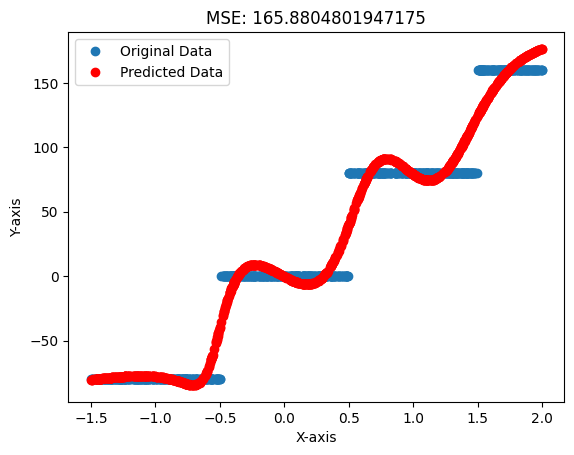

In [30]:
network = MLP([1,10,10,10,1], ['sigmoid', 'sigmoid', 'sigmoid', 'identity'])
learn_with_val_vis(data, network, 1,"MSE", 0.02, 25, 0.9, 5, 500)

# 1.2 Steps large arctan

Weights, epoch: 0, LOSS: 176873.7269922711
Weights, epoch: 25, LOSS: 87.17427948605534
Weights, epoch: 50, LOSS: 70.2518420226536
Weights, epoch: 75, LOSS: 52.419525708100814
Weights, epoch: 100, LOSS: 36.401408793503585
Weights, epoch: 125, LOSS: 33.75330806684334
Weights, epoch: 150, LOSS: 48.513483288973816
Weights, epoch: 175, LOSS: 41.7255112575877
Weights, epoch: 200, LOSS: 25.153609941813606
Weights, epoch: 225, LOSS: 26.789893829853877
Weights, epoch: 250, LOSS: 27.879512474180796
Weights, epoch: 275, LOSS: 26.920474539611746
Weights, epoch: 300, LOSS: 17.128163395924087
Weights, epoch: 325, LOSS: 20.606608585904173
Weights, epoch: 350, LOSS: 14.173204013598276
Weights, epoch: 375, LOSS: 38.99486653064818
Weights, epoch: 400, LOSS: 28.97482021583835
Weights, epoch: 425, LOSS: 21.81287584564618
Weights, epoch: 450, LOSS: 35.18980392585866
Weights, epoch: 475, LOSS: 14.060009960646603
Weights, epoch: 500, LOSS: 25.973470997615333
Weights, epoch: 501, LOSS: 13.974515255975701


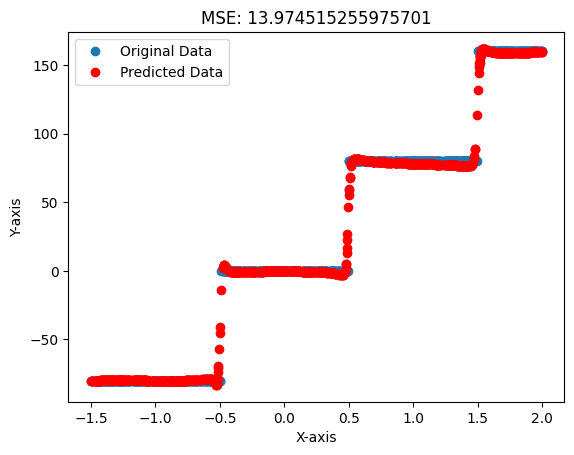

In [29]:
network = MLP([1,10,10,10,1], ['arctan', 'arctan', 'arctan', 'identity'])
learn_with_val_vis(data, network, 1,"MSE", 0.02, 25, 0.9, 5, 500)

# 2.1 Rings3 sigmoid


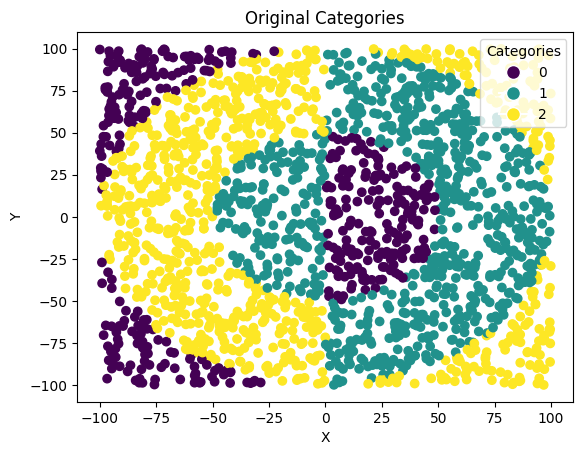

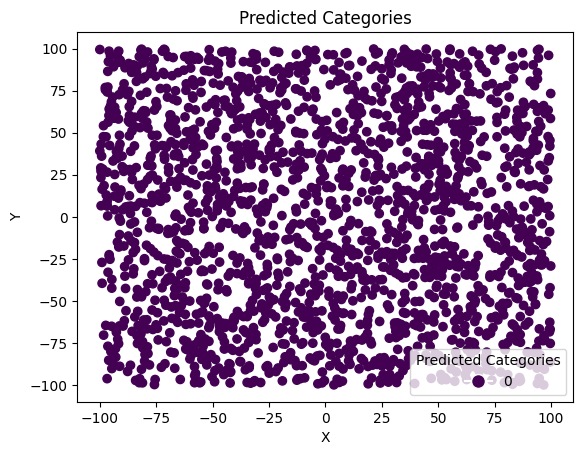

In [32]:
network = MLP([2,10,10,10,3], ["sigmoid","sigmoid", "sigmoid", "softmax"])
train = pd.read_csv("data/classification/rings3-regular-training.csv")
original_cat_train = train['c'].values
train = one_hot_encode_last_column(train)
test = pd.read_csv("data/classification/rings3-regular-test.csv")
original_cat_test = test['c'].values
test = one_hot_encode_last_column(test)


X_train = train[['x', 'y']].values
Y_train = train.drop(columns = ['x', 'y']).values
X_test = test[['x', 'y']].values
Y_test = test.drop(columns = ['x', 'y']).values

data = (X_train, Y_train, X_test, Y_test)

max_x = np.max(X_train, axis=0)
min_x = np.min(X_train, axis=0)


avgx = (max_x + min_x) / 2


x_scl = (max_x - min_x) / 2
X_tr_scl = (X_train - avgx) / x_scl
X_ts_scl = (X_test - avgx) / x_scl

pred = network.predict_multiple(X_ts_scl)
LOSS = cross_entropy_loss(Y_test, pred)
pred = np.argmax(pred, axis=1)
visualise_real_vs_predict(X_test, original_cat_test, pred)

Weights, epoch: 0, LOSS: 5080.874546799341, f-measure: 0.11479028697571743
Weights, epoch: 25, LOSS: 2123.7519261970606, f-measure: 0.36274838697299416
Weights, epoch: 50, LOSS: 2010.6215607035504, f-measure: 0.39862993320714746
Weights, epoch: 75, LOSS: 1944.6029637245526, f-measure: 0.40439476705094557
Weights, epoch: 100, LOSS: 1919.7795468869556, f-measure: 0.3963440755074977
Weights, epoch: 125, LOSS: 1887.5132401254968, f-measure: 0.4435335329766941
Weights, epoch: 150, LOSS: 1874.36232179939, f-measure: 0.4496394345061172
Weights, epoch: 175, LOSS: 1860.522457193431, f-measure: 0.45954742844651103
Weights, epoch: 200, LOSS: 1854.3996295793536, f-measure: 0.4661431403534533
Weights, epoch: 225, LOSS: 1822.9924081435597, f-measure: 0.481580853856507
Weights, epoch: 250, LOSS: 1815.623895877956, f-measure: 0.4809922718979982
Weights, epoch: 275, LOSS: 1792.8071161682856, f-measure: 0.4899960295469548
Weights, epoch: 300, LOSS: 1775.254483707936, f-measure: 0.4956113492524499
Weight

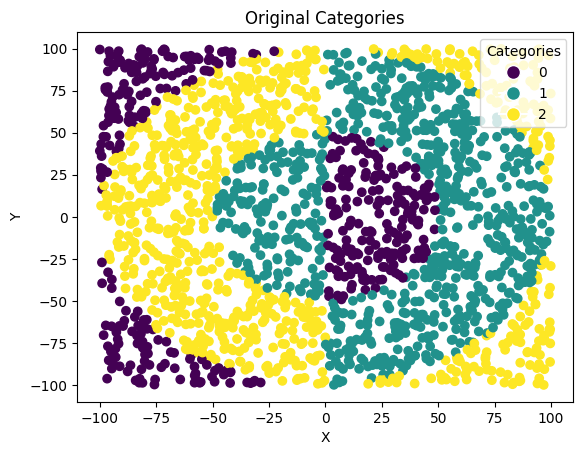

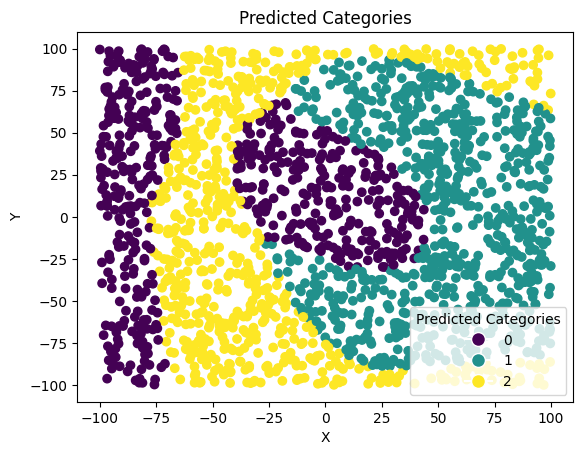

In [33]:
learn_with_val_vis(data, network, 0.97, "CE", 0.02, 25, 0.9, 32, 500)

# 2.2 Rings3 arctan

Weights, epoch: 0, LOSS: 6155.096340218075, f-measure: 0.3773891249960452
Weights, epoch: 25, LOSS: 804.3006538980944, f-measure: 0.8512246257971717
Weights, epoch: 50, LOSS: 612.4138766783558, f-measure: 0.8895278895352886
Weights, epoch: 75, LOSS: 507.1229253021321, f-measure: 0.9117654861974483
Weights, epoch: 100, LOSS: 457.934711879573, f-measure: 0.9107527836531785
Weights, epoch: 125, LOSS: 394.33235724641514, f-measure: 0.9237026624514953
Weights, epoch: 150, LOSS: 343.0315818513264, f-measure: 0.9370558160568966
Weights, epoch: 175, LOSS: 325.88491481082315, f-measure: 0.939618418487159
Weights, epoch: 200, LOSS: 286.5923053028264, f-measure: 0.9503881642326601
Weights, epoch: 225, LOSS: 270.69636346422027, f-measure: 0.9530612605219898
Weights, epoch: 250, LOSS: 268.4052208978912, f-measure: 0.9526466023773524
Weights, epoch: 275, LOSS: 242.40250852128656, f-measure: 0.9554796269128499
Weights, epoch: 300, LOSS: 224.1458245416952, f-measure: 0.95642746121717
Weights, epoch: 3

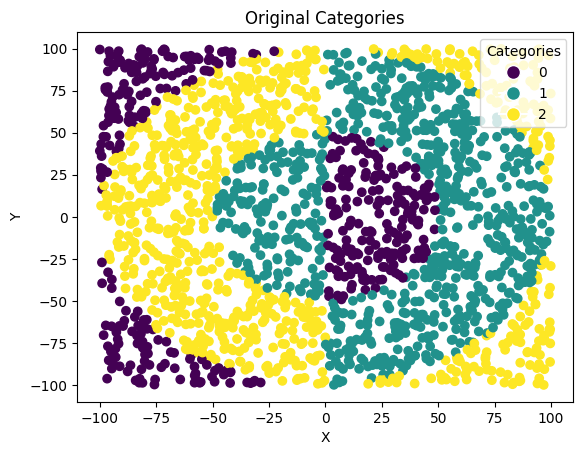

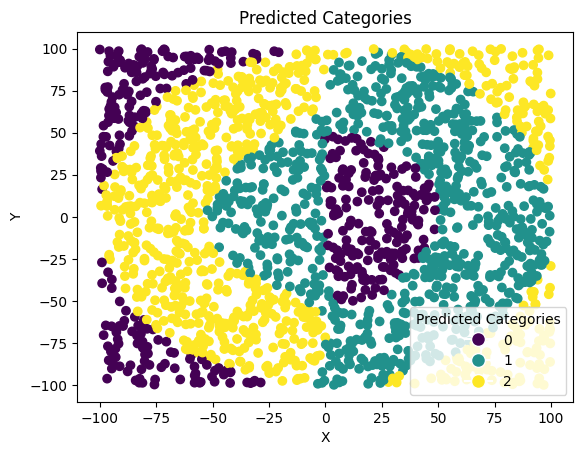

In [25]:
network = MLP([2,10,10,10,3], ["arctan","arctan", "arctan", "softmax"])
learn_with_val_vis(data, network, 0.97, "CE", 0.02, 25, 0.9, 32, 500)

# 3.1 Rings5 sigmoid

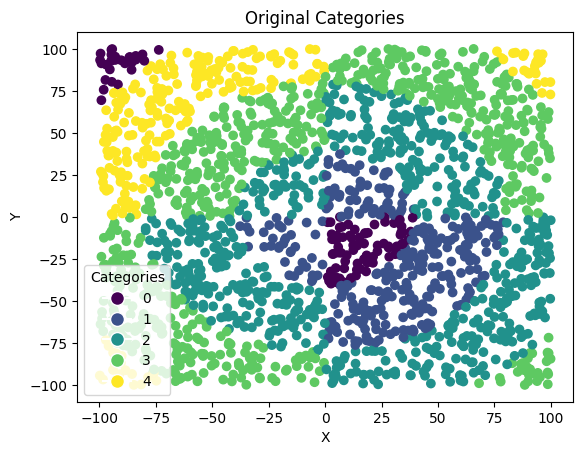

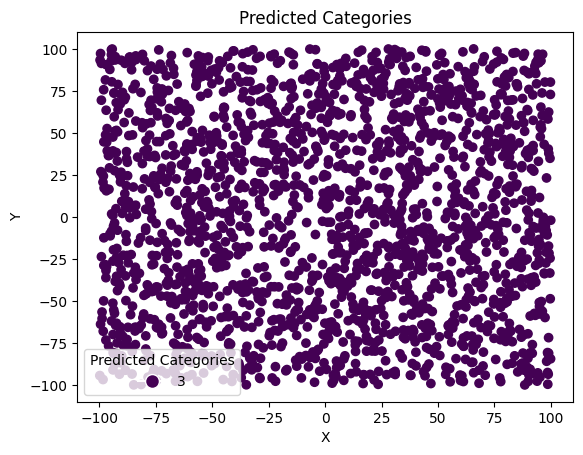

In [34]:
network = MLP([2,10,10,10,5], ["sigmoid","sigmoid", "sigmoid", "softmax"])
train = pd.read_csv("data/classification/rings5-regular-training.csv")
original_cat_train = train['c'].values
train = one_hot_encode_last_column(train)
test = pd.read_csv("data/classification/rings5-regular-test.csv")
original_cat_test = test['c'].values
test = one_hot_encode_last_column(test)


X_train = train[['x', 'y']].values
Y_train = train.drop(columns = ['x', 'y']).values
X_test = test[['x', 'y']].values
Y_test = test.drop(columns = ['x', 'y']).values

data = (X_train, Y_train, X_test, Y_test)

max_x = np.max(X_train, axis=0)
min_x = np.min(X_train, axis=0)


avgx = (max_x + min_x) / 2


x_scl = (max_x - min_x) / 2
X_tr_scl = (X_train - avgx) / x_scl
X_ts_scl = (X_test - avgx) / x_scl

pred = network.predict_multiple(X_ts_scl)
LOSS = cross_entropy_loss(Y_test, pred)
pred = np.argmax(pred, axis=1)
visualise_real_vs_predict(X_test, original_cat_test, pred)

Weights, epoch: 0, LOSS: 5497.192756318784, f-measure: 0.10282317979197622
Weights, epoch: 25, LOSS: 3170.6718330693357, f-measure: 0.23134840416883834
Weights, epoch: 50, LOSS: 3089.295003256469, f-measure: 0.3281233686150079
Weights, epoch: 75, LOSS: 2989.654161619371, f-measure: 0.3362391379924859
Weights, epoch: 100, LOSS: 2890.25633325907, f-measure: 0.3034518530805453
Weights, epoch: 125, LOSS: 2821.390434623333, f-measure: 0.25866732479145643
Weights, epoch: 150, LOSS: 2777.560294360477, f-measure: 0.2831042519724744
Weights, epoch: 175, LOSS: 2747.060426029161, f-measure: 0.30661470009844044
Weights, epoch: 200, LOSS: 2722.843761207599, f-measure: 0.3088735196602763
Weights, epoch: 225, LOSS: 2702.7122704831695, f-measure: 0.3191961819388299
Weights, epoch: 250, LOSS: 2683.6185056437926, f-measure: 0.3271080915894776
Weights, epoch: 275, LOSS: 2675.280947473515, f-measure: 0.3273574951179678
Weights, epoch: 300, LOSS: 2655.120255424003, f-measure: 0.3342593207824886
Weights, ep

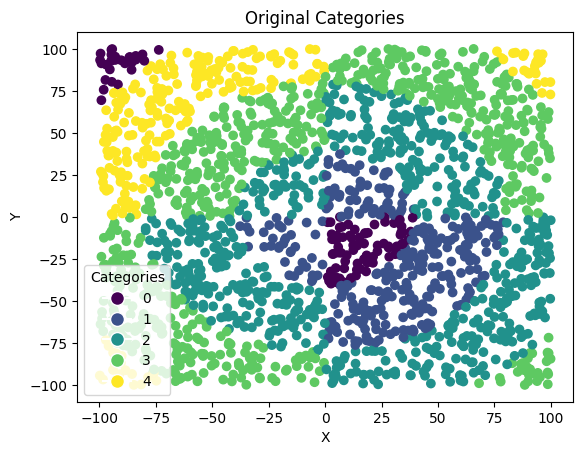

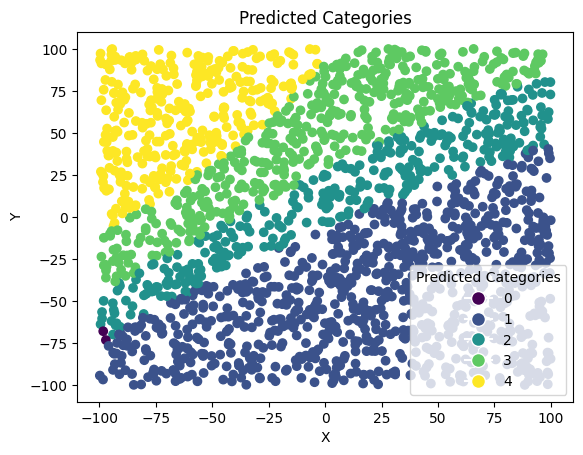

In [35]:
learn_with_val_vis(data, network, 0.97, "CE", 0.02, 25, 0.9, 32, 500)

Weights, epoch: 0, LOSS: 10414.385660513917, f-measure: 0.09937376150542981
Weights, epoch: 25, LOSS: 2146.42531705937, f-measure: 0.580235313105627
Weights, epoch: 50, LOSS: 1770.0603284726901, f-measure: 0.7305198751948612
Weights, epoch: 75, LOSS: 1365.135438358869, f-measure: 0.7501060235116195
Weights, epoch: 100, LOSS: 984.1415146253269, f-measure: 0.8430687512283714
Weights, epoch: 125, LOSS: 947.407529883398, f-measure: 0.7927232205759316
Weights, epoch: 150, LOSS: 855.2693309050244, f-measure: 0.8209584395069284
Weights, epoch: 175, LOSS: 783.3912974656664, f-measure: 0.8363530821612295
Weights, epoch: 200, LOSS: 690.8356945709971, f-measure: 0.8641908712379379
Weights, epoch: 225, LOSS: 704.9215614894106, f-measure: 0.852698558162046
Weights, epoch: 250, LOSS: 622.3400939253083, f-measure: 0.871677746622223
Weights, epoch: 275, LOSS: 677.2099439332171, f-measure: 0.8439914972826983
Weights, epoch: 300, LOSS: 599.6056312542477, f-measure: 0.8707654683831182
Weights, epoch: 325

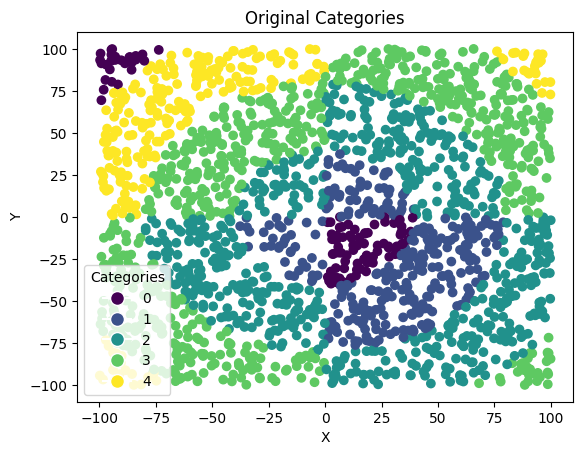

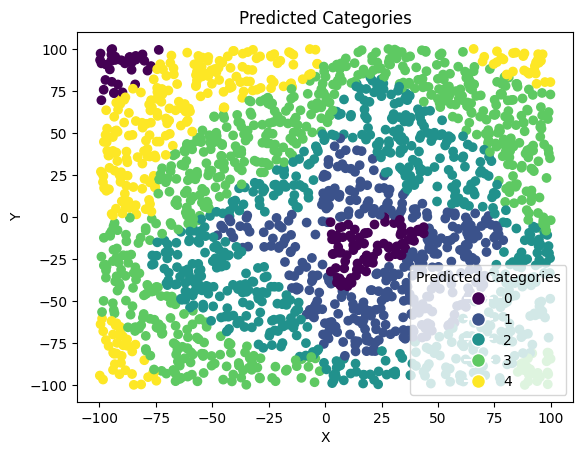

In [36]:
network = MLP([2,10,10,10,5], ["arctan","arctan", "arctan", "softmax"])
learn_with_val_vis(data, network, 0.97, "CE", 0.02, 25, 0.9, 32, 500)